In [82]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [83]:
data=pd.read_csv("Downloads/Fraud_check.csv")

In [84]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [85]:
data.shape

(600, 6)

In [86]:
data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [87]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [88]:
data.tail(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
590,NO,Married,43018,85195,14,YES
591,YES,Single,27394,132859,18,YES
592,YES,Single,68152,75143,16,NO
593,NO,Divorced,84775,131963,10,YES
594,NO,Married,47364,97526,9,YES
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [90]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [91]:
data=pd.get_dummies(data,columns=['Urban','Undergrad','Marital.Status'],drop_first=True)

In [92]:
data.head(8)

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
0,68833,50047,10,1,0,0,1
1,33700,134075,18,1,1,0,0
2,36925,160205,30,1,0,1,0
3,50190,193264,15,1,1,0,1
4,81002,27533,28,0,0,1,0
5,33329,116382,0,0,0,0,0
6,83357,80890,8,1,0,0,0
7,62774,131253,3,1,1,0,1


In [93]:
data.describe()

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333,0.503333,0.520000,0.323333,0.361667
std,26204.827597,49850.075134,8.842147,0.500406,0.500017,0.468139,0.480884
min,10003.000000,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32871.500000,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,55074.500000,106493.500000,15.000000,1.000000,1.000000,0.000000,0.000000
75%,78611.750000,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000
max,99619.000000,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
data["TaxInc"] = pd.cut(data["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [95]:
data.head()

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,TaxInc
0,68833,50047,10,1,0,0,1,Good
1,33700,134075,18,1,1,0,0,Good
2,36925,160205,30,1,0,1,0,Good
3,50190,193264,15,1,1,0,1,Good
4,81002,27533,28,0,0,1,0,Good


In [96]:
df = pd.get_dummies(data,columns = ["TaxInc"],drop_first=True)
df.head(20)

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,TaxInc_Good
0,68833,50047,10,1,0,0,1,1
1,33700,134075,18,1,1,0,0,1
2,36925,160205,30,1,0,1,0,1
3,50190,193264,15,1,1,0,1,1
4,81002,27533,28,0,0,1,0,1
5,33329,116382,0,0,0,0,0,1
6,83357,80890,8,1,0,0,0,1
7,62774,131253,3,1,1,0,1,1
8,83519,102481,12,1,0,0,1,1
9,98152,155482,4,1,1,0,0,1


In [97]:
df.describe()

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,TaxInc_Good
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333,0.503333,0.520000,0.323333,0.361667,0.793333
std,26204.827597,49850.075134,8.842147,0.500406,0.500017,0.468139,0.480884,0.405252
min,10003.000000,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32871.500000,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,55074.500000,106493.500000,15.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,78611.750000,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,99619.000000,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [99]:
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,TaxInc_Good
590,0.341473,0.466667,1.0,0.0,1.0,0.0,1.0
591,0.615406,0.600000,1.0,1.0,0.0,1.0,0.0
592,0.283703,0.533333,0.0,1.0,0.0,1.0,1.0
593,0.610256,0.333333,1.0,0.0,0.0,0.0,1.0
594,0.412341,0.300000,1.0,0.0,1.0,0.0,1.0
595,0.078811,0.233333,1.0,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,1.0,0.0,0.0,1.0
597,0.737240,0.000000,1.0,0.0,0.0,0.0,1.0
598,0.886810,0.566667,0.0,1.0,1.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [100]:
# Declaring features & target
x= df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [101]:
x

,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
0,0.139472,0.333333,1.0,0.0,0.0,1.0
1,0.622394,0.600000,1.0,1.0,0.0,0.0
2,0.772568,1.000000,1.0,0.0,1.0,0.0
3,0.962563,0.500000,1.0,1.0,0.0,1.0
4,0.010081,0.933333,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,1.0,0.0,0.0
596,0.170058,0.066667,1.0,1.0,0.0,0.0
597,0.737240,0.000000,1.0,0.0,0.0,0.0
598,0.886810,0.566667,0.0,1.0,1.0,0.0


In [102]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: TaxInc_Good, Length: 600, dtype: float64

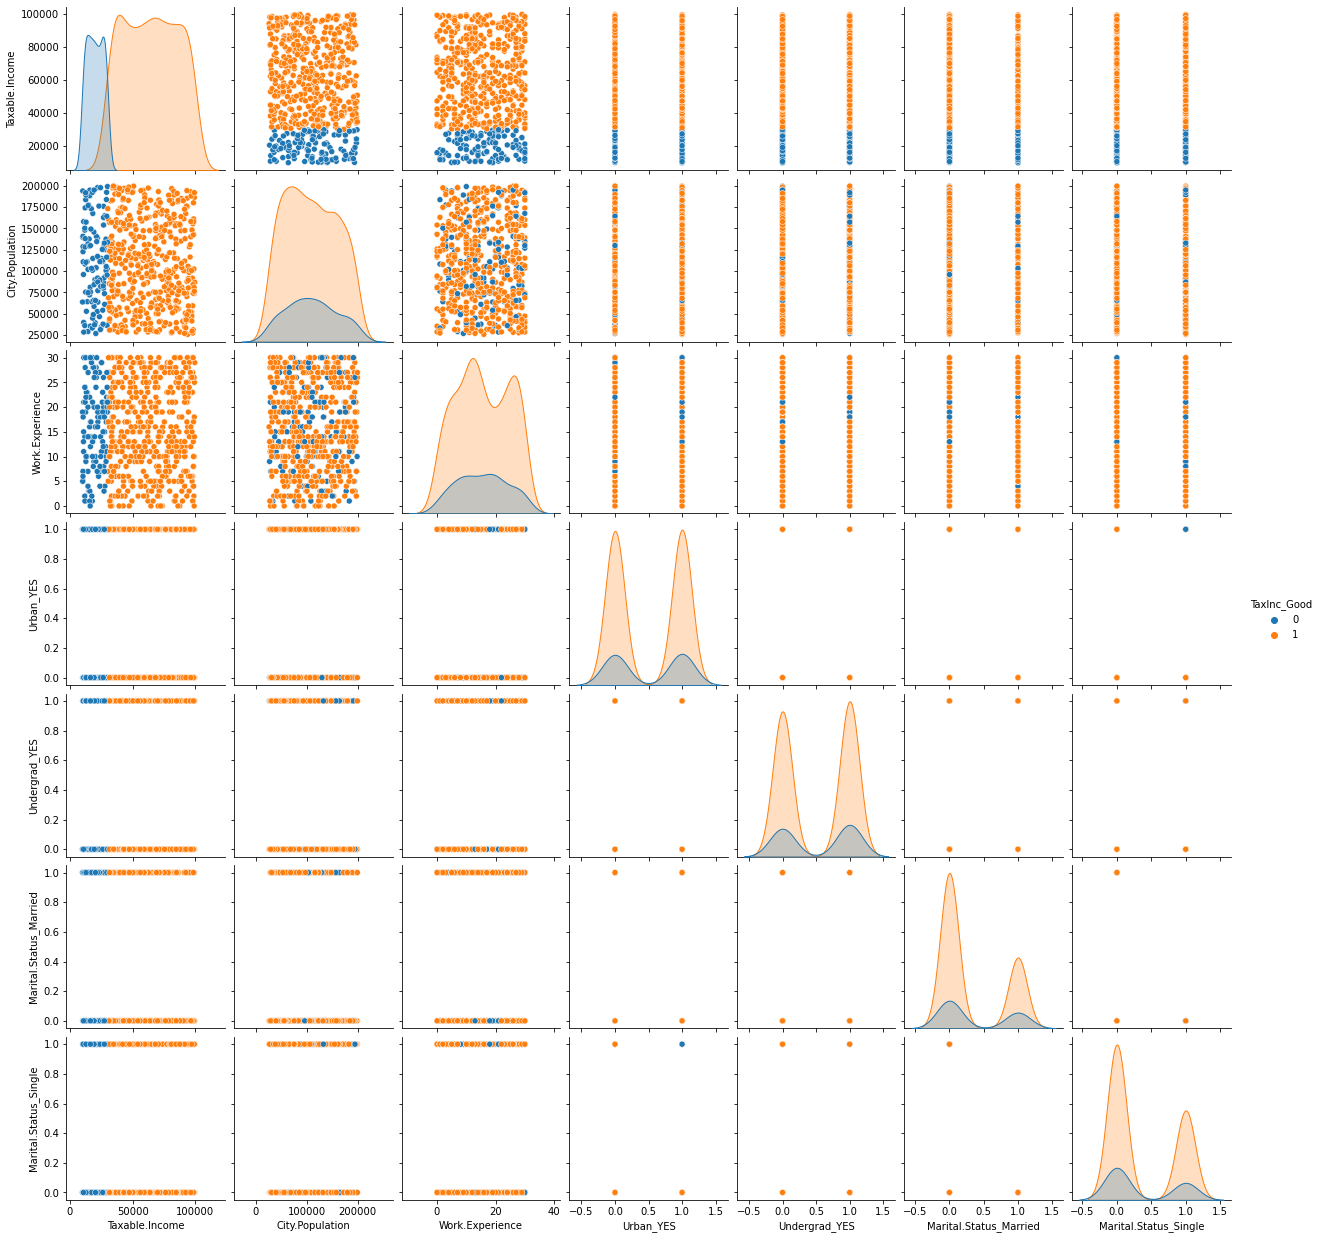

In [103]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')

In [104]:
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [105]:
features

,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married
0,50047,10,1,0,0
1,134075,18,1,1,0
2,160205,30,1,0,1
3,193264,15,1,1,0
4,27533,28,0,0,1
...,...,...,...,...,...
595,39492,7,1,1,0
596,55369,2,1,1,0
597,154058,0,1,0,0
598,180083,17,0,1,1


In [106]:
# Splitting data into train & test
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [107]:
df['TaxInc_Good'].unique() 

array([1, 0], dtype=uint8)

In [108]:
df.TaxInc_Good.value_counts()

1    476
0    124
Name: TaxInc_Good, dtype: int64

In [109]:
df.columns

Index(['City.Population', 'Work.Experience', 'Urban_YES', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'TaxInc_Good'],
      dtype='object')

# Building Decision Tree Classifier using Entropy Criteria

In [110]:
model = DecisionTreeClassifier(criterion ='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [111]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

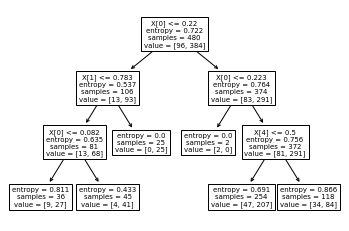

In [112]:
#PLot the decision tree
tree.plot_tree(model);

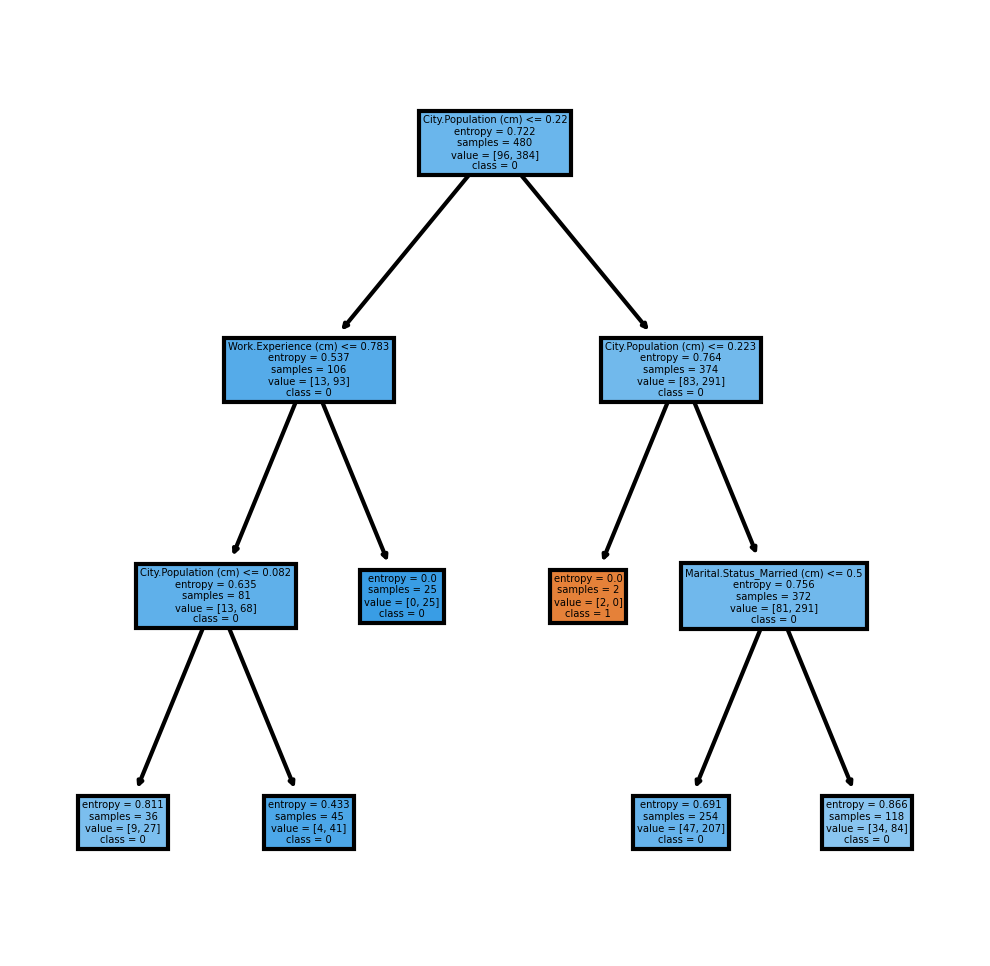

In [113]:
fn=['City.Population (cm)','Work.Experience (cm)','Urban_YES (cm)','Undergrad_YES (cm)','Marital.Status_Married (cm)',
       'TaxInc_Good (cm)']
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [114]:
model.feature_importances_ 

array([0.55523026, 0.27033287, 0.        , 0.        , 0.17443688,
       0.        ])

In [115]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

City.Population (cm)           0.555230
Work.Experience (cm)           0.270333
Marital.Status_Married (cm)    0.174437
Urban_YES (cm)                 0.000000
Undergrad_YES (cm)             0.000000
TaxInc_Good (cm)               0.000000
dtype: float64

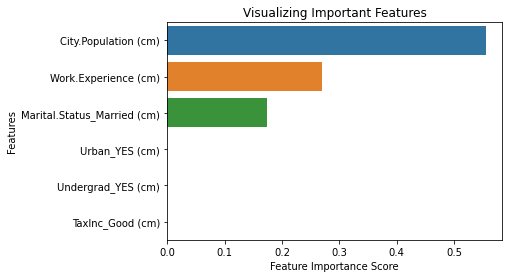

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [117]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

1.0    120
dtype: int64

In [118]:
preds 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [119]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,1.0
TaxInc_Good,
0.0,28
1.0,92


In [120]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

# Building Decision Tree Classifier (CART) using Gini Criteria

In [121]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [122]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [123]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean (preds==y_test)

0.7666666666666667

In [124]:
model.feature_importances_ 

array([0.55523026, 0.27033287, 0.        , 0.        , 0.17443688,
       0.        ])